# Import required files
Tahap awal memasukan modul yang dibutuhkan untuk membuat model CNN

In [ ]:
# Building deep learning models
import tensorflow as tf 
from tensorflow import keras 
# For accessing pre-trained models
import tensorflow_hub as hub 
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

from keras.preprocessing import image
from tensorflow.keras import layers, models
import tensorflow as tf
import keras
import numpy as np
import matplotlib.cm as cm
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sample image analysis
Selanjutnya memasukan sample data dari setiap jenis beras

In [2]:
path = "/Users/rama/Documents/project/Rice_classification/Rice_Image_Dataset"
path = pathlib.Path(path)

In [3]:
arborio = list(path.glob('Arborio/*'))[:600]
basmati = list(path.glob('Basmati/*'))[:600]
ipsala = list(path.glob('Ipsala/*'))[:600]
jasmine = list(path.glob('Jasmine/*'))[:600]
karacadag = list(path.glob('Karacadag/*'))[:600]

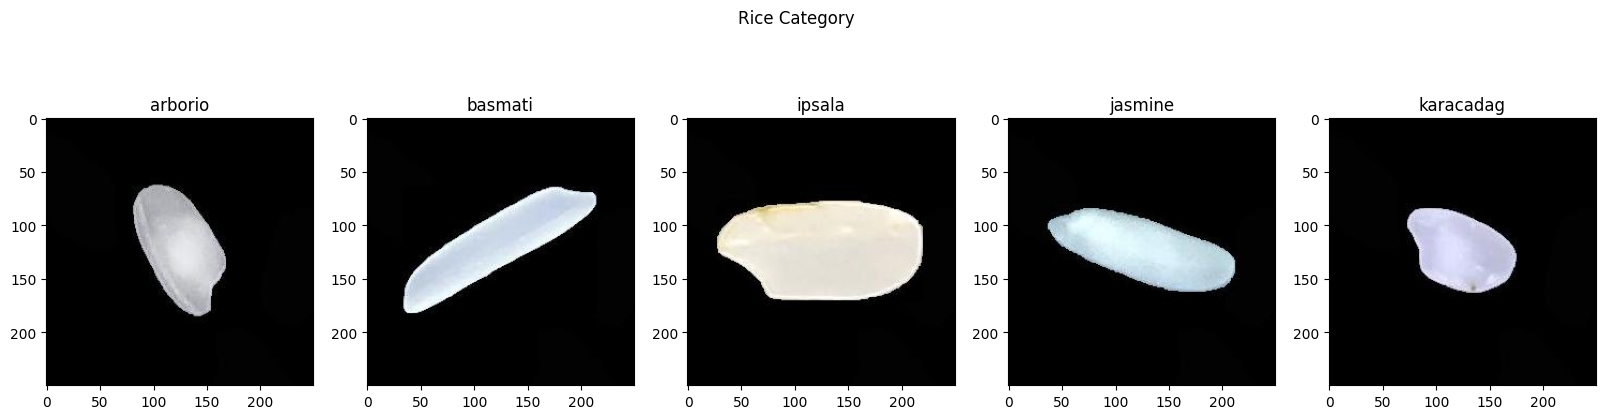

In [4]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_img = img.imread(arborio[0])
basmati_img = img.imread(basmati[0])
ipsala_img = img.imread(ipsala[0])
jasmine_img = img.imread(jasmine[0])
karacadag_img = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')


ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

# Image labeling
Image labeling dilakukan untuk melabelkan setiap jenis beras

In [5]:
data_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

# Contains numerical labels for the categories
data_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

,image,label
arborio,[/Users/rama/Documents/project/Rice_classifica...,0
basmati,[/Users/rama/Documents/project/Rice_classifica...,1
ipsala,[/Users/rama/Documents/project/Rice_classifica...,2
jasmine,[/Users/rama/Documents/project/Rice_classifica...,3
karacadag,[/Users/rama/Documents/project/Rice_classifica...,4


# Image and label split
Selanjutnya merubah ukuran gambar menjadi 224,224

In [13]:
X, y = [], [] # X = images, y = labels
for label, images in data_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(data_labels[label])

In [14]:
X = np.array(X)
X = X/255
y = np.array(y)

# Training & developement data split
Training dilakukan dengan data yang sudah diubah ukurannya

In [15]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

Lalu masukan beberapa modul untuk melakukan pembuatan model

In [16]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Model building
Arsitektur yang digunakan dalam model ini adalah MobileNet. MobileNet jaringan neural visi komputer yang dirancang khusus untuk inferensi efisien pada perangkat seluler dengan sumber daya komputasi terbatas. Ini dikembangkan oleh Google dan diperkenalkan dalam makalah tahun 2017 berjudul “MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications”. Arsitektur MobileNet didasarkan pada versi sederhana dari arsitektur Inception, yang dikembangkan untuk tugas klasifikasi gambar. Ini menggunakan konvolusi yang dapat dipisahkan secara mendalam, yang merupakan jenis operasi konvolusi yang dapat secara signifikan mengurangi jumlah parameter dan biaya komputasi dalam jaringan tanpa mengorbankan akurasi.

In [17]:
base_model = MobileNet(weights="imagenet", 
                       include_top=False, 
                       input_shape=(224, 224, 3))

In [18]:
base_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [19]:
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(32, activation="relu"))
top_model.add(Dense(10, activation="softmax"))

top_model.summary()

/Users/rama/.pyenv/versions/3.11.8/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     1,605,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,605,994 (6.13 MB)

 Trainable params: 1,605,994 (6.13 MB)

 Non-trainable params: 0 (0.00 B)

# Training Model
Lakukan training model

In [20]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(top_model)

transfer_model.layers[0].trainable = False
transfer_model.summary()

transfer_model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = transfer_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ ?                      │     1,605,994 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,834,858 (18.44 MB)

 Trainable params: 1,605,994 (6.13 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

Epoch 1/10


/Users/rama/.pyenv/versions/3.11.8/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


71/71 ━━━━━━━━━━━━━━━━━━━━ 25s 332ms/step - acc: 0.7578 - loss: 1.7898 - val_acc: 0.9787 - val_loss: 0.1012
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step - acc: 0.9857 - loss: 0.0583 - val_acc: 0.9894 - val_loss: 0.0270
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 243ms/step - acc: 0.9966 - loss: 0.0143 - val_acc: 0.9894 - val_loss: 0.0517
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 244ms/step - acc: 0.9976 - loss: 0.0063 - val_acc: 0.9947 - val_loss: 0.0147
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step - acc: 0.9998 - loss: 0.0028 - val_acc: 0.9947 - val_loss: 0.0164
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 238ms/step - acc: 0.9987 - loss: 0.0035 - val_acc: 0.9947 - val_loss: 0.0148
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 241ms/step - acc: 1.0000 - loss: 0.0012 - val_acc: 0.9947 - val_loss: 0.0163
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 253ms/step - acc: 1.0000 - loss: 9.4874e-04 - val_acc: 0.9947 - val_loss: 0.0167
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - 

# Performance analysis
Selanjutnya melihat performa akurasi yang dihasilkan oleh model yang dibuat

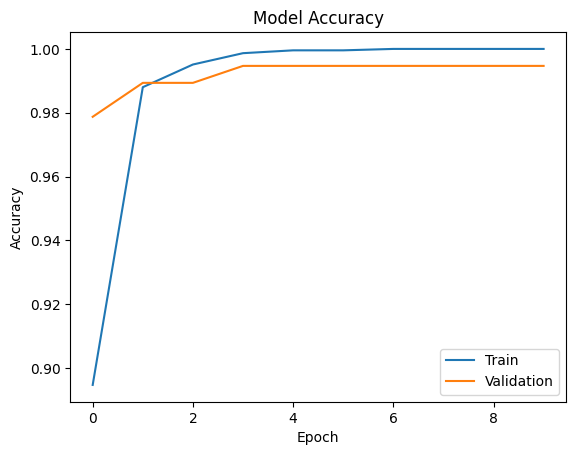

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

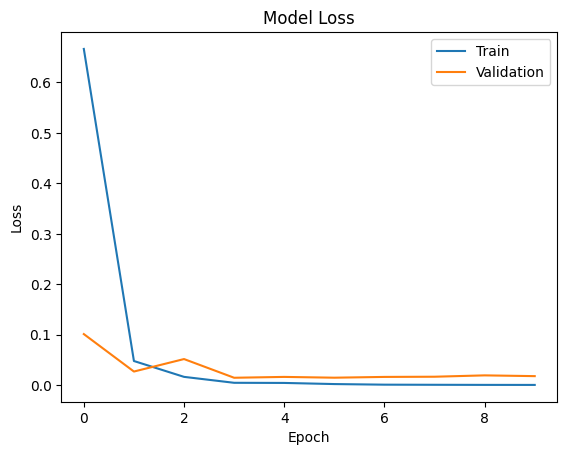

In [22]:
# Summarize History for Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

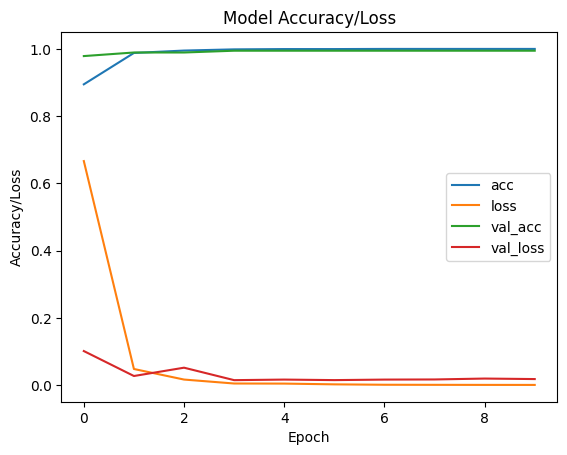

In [23]:
# Accuracy Loss Graph

pd.DataFrame(history.history).plot()
plt.title('Model Accuracy/Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.show()

# Aktivation Mapping

Pemetaan aktivasi adalah teknik yang digunakan untuk memvisualisasikan aktivasi atau keluaran neuron individu dalam jaringan saraf. Ini melibatkan pembuatan peta atau peta panas dari aktivasi setiap neuron dalam jaringan saat memproses gambar masukan. Ini dapat memberikan wawasan tentang bagaimana jaringan memproses input dan bagaimana membuat keputusan tentang input tersebut. Ada beberapa cara untuk membuat peta aktivasi, tetapi salah satu metode yang umum adalah dengan melewatkan gambar masukan melalui jaringan dan kemudian menggunakan pengoptimalan berbasis gradien untuk memodifikasi gambar masukan sedemikian rupa sehingga dapat mengaktifkan neuron tertentu secara maksimal. Hal ini dapat dilakukan dengan menghitung gradien aktivasi neuron sehubungan dengan gambar masukan, dan kemudian menggunakan gradien ini untuk memperbarui gambar masukan dengan cara meningkatkan aktivasi neuron. Pemetaan aktivasi dapat berguna untuk memahami cara kerja jaringan saraf dan mengidentifikasi potensi masalah atau bias dalam jaringan. Itu juga dapat digunakan untuk membuat teknik visualisasi seperti peta arti-penting, yang menyoroti wilayah gambar input yang paling penting untuk proses pengambilan keputusan jaringan.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


/var/folders/fs/vm05c0zd0vq2tvdpxqv3bckm0000gn/T/ipykernel_28275/3188394450.py:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


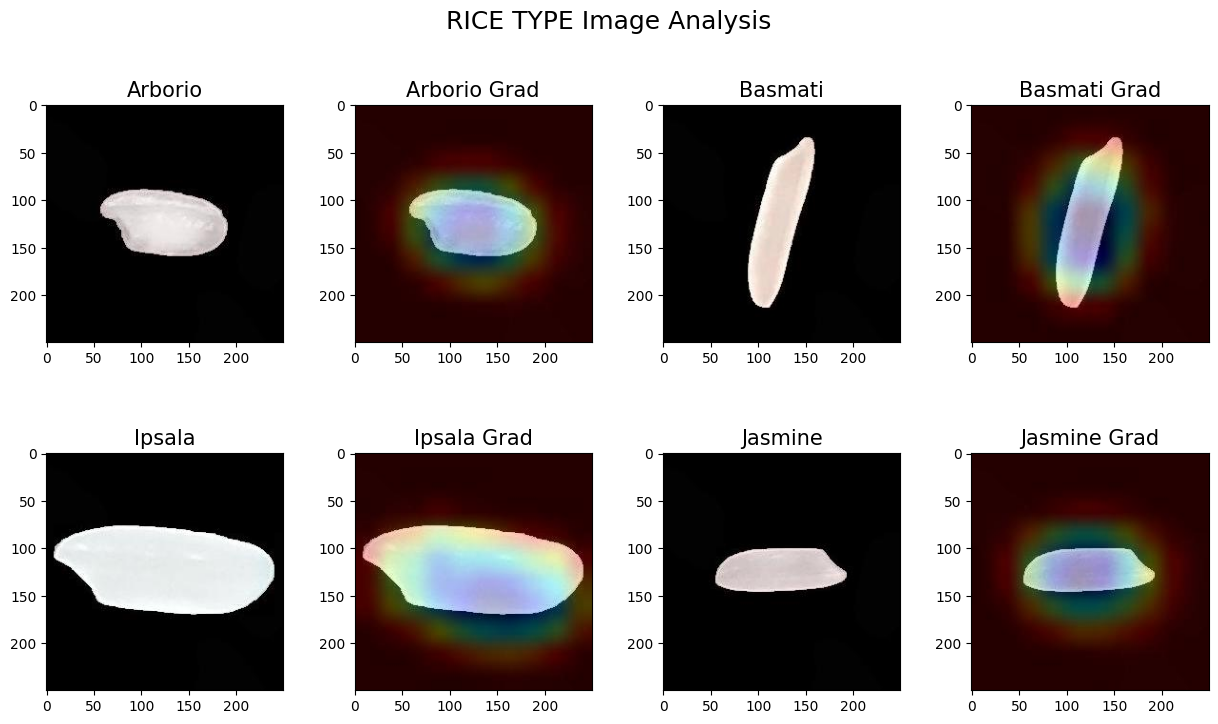

In [24]:
list_images_sample = ["/Users/rama/Documents/project/Rice_classification/Rice_Image_Dataset/Arborio/Arborio (1).jpg",
"/Users/rama/Documents/project/Rice_classification/Rice_Image_Dataset/Basmati/Basmati (1).jpg",
"/Users/rama/Documents/project/Rice_classification/Rice_Image_Dataset/Ipsala/Ipsala (1).jpg",
"/Users/rama/Documents/project/Rice_classification/Rice_Image_Dataset/Jasmine/Jasmine (1).jpg"]

model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions
imag = []

last_conv_layer_name = "block14_sepconv2_act"
# To Get Image into numpy array

def get_img_array(img_path, size):
    img = keras.preprocessing.image.load_img(img_path, target_size = size) 
    array = keras.preprocessing.image.img_to_array(img) 
    array = np.expand_dims(array, axis = 0)
    return array

# Top create heatmaps for the samples

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index = None):
    grad_model = tf.keras.models.Model(model.inputs, [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Storing Heatmap values into list

covid_noncovid_heatmap = []

for i in list_images_sample:
    img_array = preprocess_input(get_img_array(i, size = img_size))
    model = model_builder(weights = "imagenet")
    model.layers[-1].activation = None
    preds = model.predict(img_array)
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    covid_noncovid_heatmap.append(heatmap)
# To Display GradCAM output for the samples

def save_and_display_gradcam(img_path, heatmap, cam_path = "cam.jpg", alpha = 0.4):
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)

    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    superimposed_img.save(cam_path)
    
    imag.append(cv2.imread(img_path))
    imag.append(cv2.imread("./cam.jpg"))


for i in range(len(list_images_sample)):
    save_and_display_gradcam(list_images_sample[i], covid_noncovid_heatmap[i])
    
    
def plot_multiple_img(img_matrix_list, title_list, ncols, main_title = ""):
    
    fig, myaxes = plt.subplots(figsize = (15, 8), nrows = 2, ncols = ncols, squeeze = False)
    fig.suptitle(main_title, fontsize = 18)
    fig.subplots_adjust(wspace = 0.3)
    fig.subplots_adjust(hspace = 0.3)
    
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        myaxes[i // ncols][i % ncols].imshow(img)
        myaxes[i // ncols][i % ncols].set_title(title, fontsize = 15)
        
    plt.show()
    
    

titles_list = ["Arborio",'Arborio Grad','Basmati','Basmati Grad','Ipsala','Ipsala Grad','Jasmine','Jasmine Grad']

plot_multiple_img(imag, titles_list, ncols = 4, main_title = "RICE TYPE Image Analysis")

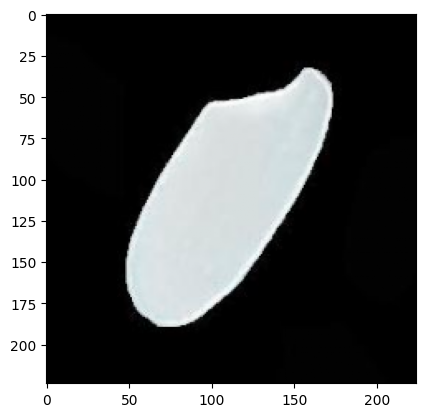

Label yang benar adalah: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Nilai yang diprediksi adalah: [1.6933064e-09 5.0948735e-15 1.0000000e+00 4.5359849e-09 2.7204038e-26
 8.4680794e-36 1.6144457e-24 1.0178864e-27 5.0896509e-29 0.0000000e+00]
Label yang diprediksi adalah: 2
Rice Type yang diprediksi adalah: ipsala
Prediksi benar


In [25]:
n = 200 # Jangan melampaui (jumlah gambar test - 1)

plt.imshow(X_test[n])
plt.show()

label_benar = y_test[n]
print("Label yang benar adalah:", label_benar)

prediksi = transfer_model.predict(X_test[n][np.newaxis,...])[0]
print("Nilai yang diprediksi adalah:", prediksi)

label_prediksi = np.argmax(prediksi)
print("Label yang diprediksi adalah:", label_prediksi)

label_dict = {v: k for k, v in data_labels.items()}  # Membuat kamus label

print("Rice Type yang diprediksi adalah:", label_dict[label_prediksi])

if label_benar == label_prediksi:
    print("Prediksi benar")
else:
    print("Prediksi salah")

In [26]:
# Melakukan prediksi pada data uji
y_pred = transfer_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Menampilkan laporan klasifikasi
from sklearn.metrics import classification_report

classificationReport = classification_report(y_test, y_pred)
print(f'Laporan Klasifikasi:\n{classificationReport}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       117
           1       1.00      1.00      1.00       122
           2       1.00      1.00      1.00       100
           3       1.00      0.99      1.00       107
           4       1.00      0.98      0.99       116

    accuracy                           0.99       562
   macro avg       0.99      0.99      0.99       562
weighted avg       0.99      0.99      0.99       562



In [27]:
results = transfer_model.evaluate(X_test, y_test, verbose=0)

print("    Loss Pengujian: {:.5f}".format(results[0]))
print("Akurasi Pengujian: {:.2f}%".format(results[1] * 100))

    Loss Pengujian: 0.04114
Akurasi Pengujian: 99.47%
